In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('pubg.csv')

In [5]:
df.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [6]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000
mean,0.234600,1.088500,129.211264,0.64400,0.221700,1.354000,47.663100,506.970200,0.913400,0.543800,...,0.160200,600.693584,0.004200,4.385917,0.024400,0.007700,1130.008410,3.63590,609.3440,0.469926
std,0.575149,1.703279,167.193945,1.09562,0.577046,2.629102,27.424146,627.297959,1.524117,0.701948,...,0.454045,1524.915601,0.074719,30.889620,0.171486,0.089674,1168.597983,2.42209,739.7924,0.304508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.575000,2.00000,0.0000,0.200000
50%,0.000000,0.000000,83.805000,0.00000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.350000,3.00000,0.0000,0.458300
75%,0.000000,2.000000,185.325000,1.00000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,...,0.000000,0.000575,0.000000,0.000000,0.000000,0.000000,1923.250000,5.00000,1495.0000,0.735100
max,7.000000,18.000000,3469.000000,11.00000,14.000000,31.000000,100.000000,1926.000000,35.000000,4.000000,...,5.000000,28780.000000,3.000000,971.200000,3.000000,2.000000,10490.000000,41.00000,1863.0000,1.000000


the maximum vehicles destroyed are 2
the maximum number of weapons picked up are 41
maximum team kills are 3
Maximum distance traveled by swimming measured in meters is 971.2
Minimum ranking in match of number of enemy players killed is 1

In [8]:
df['kills'].mean()

0.9134

In [9]:
df['kills'].describe(percentiles=[0.99])

count    10000.000000
mean         0.913400
std          1.524117
min          0.000000
50%          0.000000
99%          7.000000
max         35.000000
Name: kills, dtype: float64

In [ ]:
99% of people have 7 kills

In [10]:
df['kills'].max()

35

In [11]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

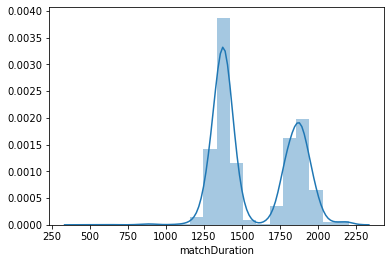

In [12]:
sns.distplot(df['matchDuration'],bins=20) 

it can be observed that most of the matches are in the duration range of 1125 to 1625 and 1600 to 2125 seconds.

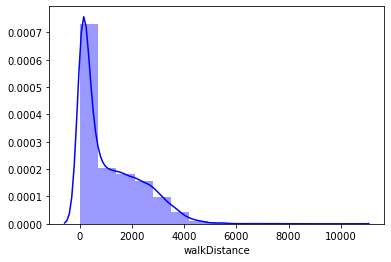

In [13]:
sns.distplot(df['walkDistance'], color ='blue',bins=15) 

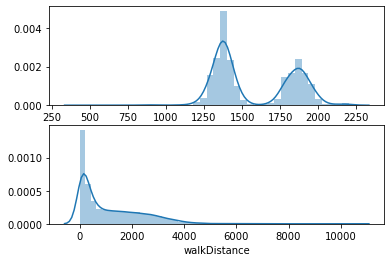

In [14]:
fig, ax =plt.subplots(2,1)
sns.distplot(df['matchDuration'], ax=ax[0])
sns.distplot(df['walkDistance'], ax=ax[1])
plt.show()

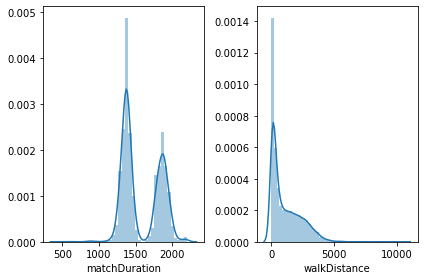

In [15]:
fig, ax =plt.subplots(1,2)
sns.distplot(df['matchDuration'], ax=ax[0])
sns.distplot(df['walkDistance'], ax=ax[1])
plt.tight_layout()

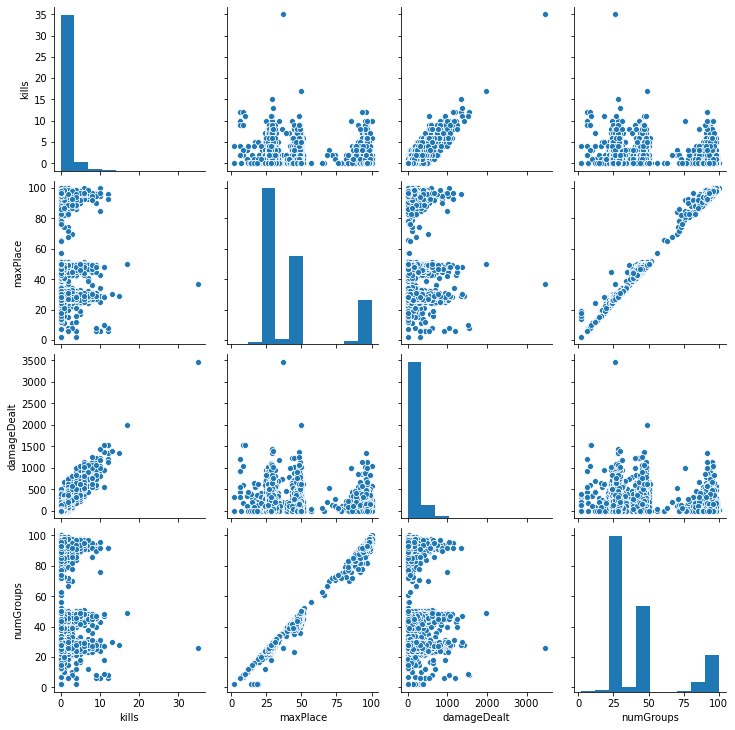

In [16]:
sns.pairplot(df[['kills','maxPlace','damageDealt','numGroups']])

As the number of kills increases, the damage dealt also increases simultaneously with most of the kills ranging between 0 to 10 and damge ranging between 0 to 1000 and establishes a linear relationship.
In most of the cases, maxPlace is equal to number of groups and in some places, data mismatch leads to their inequality

In [17]:
df['matchType'].value_counts()

squad-fpp           3969
duo-fpp             2282
squad               1359
solo-fpp            1234
duo                  702
solo                 386
normal-squad-fpp      24
normal-duo-fpp        13
crashfpp              13
normal-solo-fpp        8
normal-squad           4
flaretpp               3
crashtpp               2
flarefpp               1
Name: matchType, dtype: int64

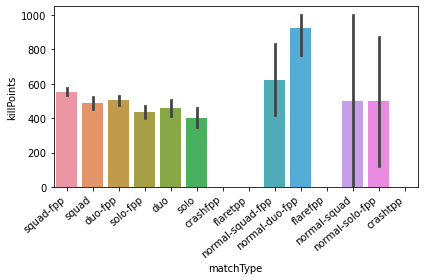

In [18]:
ax = sns.barplot(x='matchType',y='killPoints',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

normal dup fpp and normal squad fpp has the highest kill points among all match types.
crashtpp, flaretpp, flarefpp and crashfpp have the least kill points or zero kill points.
Rest all match types are approximately having equal killpoints in general.


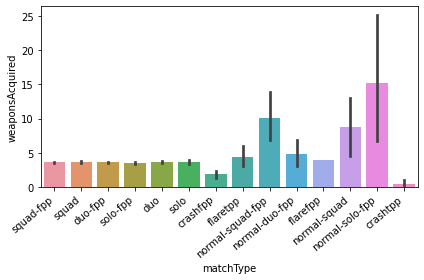

In [19]:
ax = sns.barplot(x='matchType',y='weaponsAcquired',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Normal solo fpp has the highest weapons acquired foloowed by normal squad fpp and normal squad.
squad fpp, squad, duofpp, solo fpp, duo, solo has equal number of weapons acquired.
crash tpp has the least number of weapons acquired followed by crash fpp.

In [20]:
df.select_dtypes(include=['object']).columns

Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object')

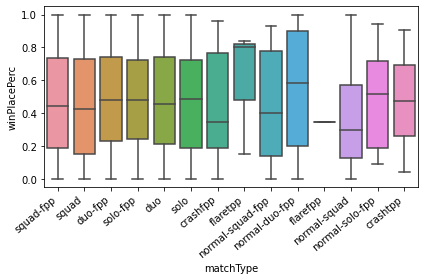

In [21]:
ax = sns.boxplot(x='matchType',y='winPlacePerc',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Normal duo fpp has the highest win percentageout of all the match types.
The upper bound of win percentage of squad fpp, squad, duo fpp, solo fpp, duo and solo are almost identicals while their lower bound is slightly different.
The median of flare tpp is the highest among all match types.
flare fpp is the least among all match types


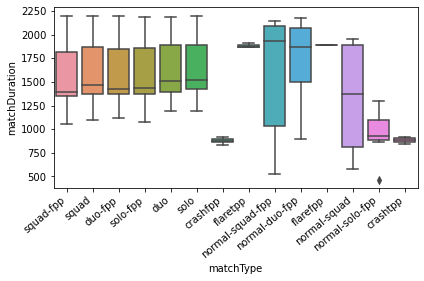

In [22]:
ax = sns.boxplot(x='matchType',y='matchDuration',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.tight_layout()
plt.show()

Normal Squad fpp has the highest match duration overall 
Squad fpp, squad, duo fpp, solo fpp, duo, solo have almost identical lower and upper bound of match duration.
Almost all the matches of crash fpp and crahs tpp are in between 750 and 1000 seconds
Normal solo fpp has the least match duration less than 500 seconds.

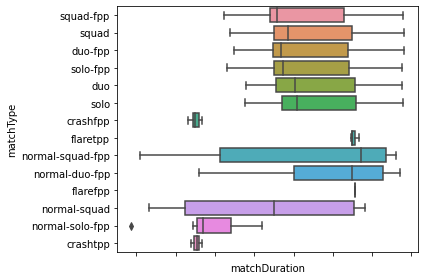

In [23]:
ax = sns.boxplot(y='matchType',x='matchDuration',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [24]:
df['KILL'] = df['headshotKills']+df['teamKills']+df['roadKills']
df[['KILL','headshotKills','roadKills','teamKills']]

,KILL,headshotKills,roadKills,teamKills
0,0,0,0,0
1,1,1,0,0
2,1,1,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
9995,0,0,0,0
9996,0,0,0,0
9997,0,0,0,0
9998,0,0,0,0


In [25]:
df['winPlacePerc'] = df['winPlacePerc'].round(2)
df['winPlacePerc'].head()

0    0.00
1    0.22
2    0.86
3    0.35
4    0.07
Name: winPlacePerc, dtype: float64

(array([ 6.,  7., 14., 18., 18.,  9., 11.,  8.,  5.,  4.]),
 array([ 82.43048 ,  92.613832, 102.797184, 112.980536, 123.163888,
        133.34724 , 143.530592, 153.713944, 163.897296, 174.080648,
        184.264   ]),
 <a list of 10 Patch objects>)

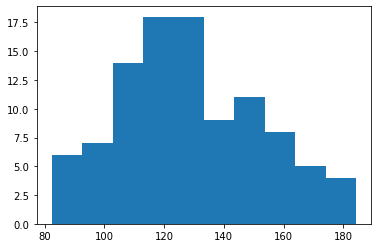

In [27]:
import random
means=[]
damage = df['damageDealt'].tolist()
for i in range(0,100):
    samples = random.choices(damage,k=50)
    means.append(sum(samples)/50)
plt.hist(means)